# ABOUT THE DATA  AND THE PROBELM



This Data provides up-to-date information on the sales performance and popularity of various video games worldwide. The data includes the name, platform, year of release, genre, publisher, and sales in North America, Europe, Japan, and other regions. It also features scores and ratings from both critics and users, including average critic score, number of critics reviewed, average user score, number of users reviewed, developer, and rating. This comprehensive and essential dataset offers valuable insights into the global video game market and is a must-have tool for gamers, industry professionals, and market researchers.

* Name	-The name of the video game.
* Platform	-The platform on which the game was released, such as PlayStation, Xbox, Nintendo, etc.
* Year of Release	-The year in which the game was released.
* Genre	-The genre of the video game, such as action, adventure, sports, etc.
* Publisher	-The company responsible for publishing the game.
* NA Sales	-The sales of the game in North America.
* EU Sales	-The sales of the game in Europe.
* JP Sales	-The sales of the game in Japan.
* Other Sales	-The sales of the game in other regions.
* Global Sales	-The total sales of the game across the world.
* Critic Score	-The average score given to the game by professional critics.
* Critic Count	-The number of critics who reviewed the game.
* User Score	-The average score given to the game by users.
* User Count	-The number of users who reviewed the game.
* Developer	-The company responsible for developing the game.
* Rating	-The rating assigned to the game by organizations such as the ESRB or PEG



Problem is to predict the Global Sales of the Games and the impact of various independent variables on Sales.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sfa
import statsmodels.api as sma
from sklearn.preprocessing import LabelEncoder,StandardScaler
le = LabelEncoder()
sc = StandardScaler()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"D:\Jupyter Notebook\datasets\Video_Games.csv")

In [3]:
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [5]:
df1 = df.copy(deep=False)

In [6]:
df1

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df1.drop(['Name','Platform','Year_of_Release','Publisher','Developer'],axis=1,inplace=True)

In [8]:
df1

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Sports,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,E
1,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Racing,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,E
3,Sports,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,E
4,Role-Playing,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16714,Action,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN
16715,Sports,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN
16716,Adventure,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN
16717,Platform,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN


In [9]:
df['User_Score'].value_counts()

tbd    2425
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: User_Score, Length: 96, dtype: int64

In [10]:
a = df1[df1.User_Score=='tbd'].index

In [11]:
df1.drop(a,inplace=True)

# UNIVARIATE ANALYSIS

In [12]:
df1.select_dtypes(include=np.number).columns

Index(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
       'Critic_Score', 'Critic_Count', 'User_Count'],
      dtype='object')

In [13]:
numcols= ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
       'Critic_Score', 'Critic_Count', 'User_Count','User_Score']

In [14]:
df1.select_dtypes(include='object').columns

Index(['Genre', 'User_Score', 'Rating'], dtype='object')

In [15]:
catcols= ['Genre', 'Rating']

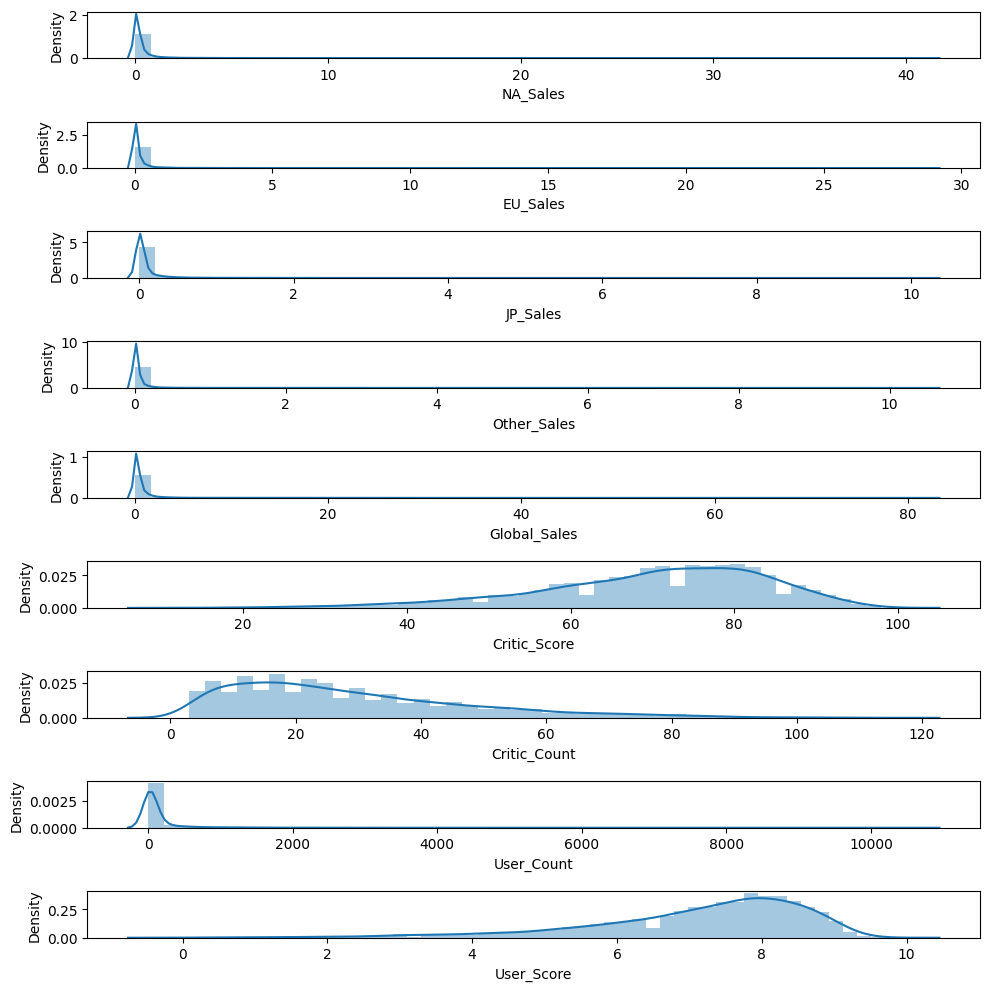

In [16]:
rep=1
nrows=9
ncols=1


plt.figure(figsize=(10,10))
for i in numcols:
    plt.subplot(nrows,ncols,rep)
    sns.distplot(df1.loc[:,i])
    rep+=1

plt.tight_layout()
plt.show()

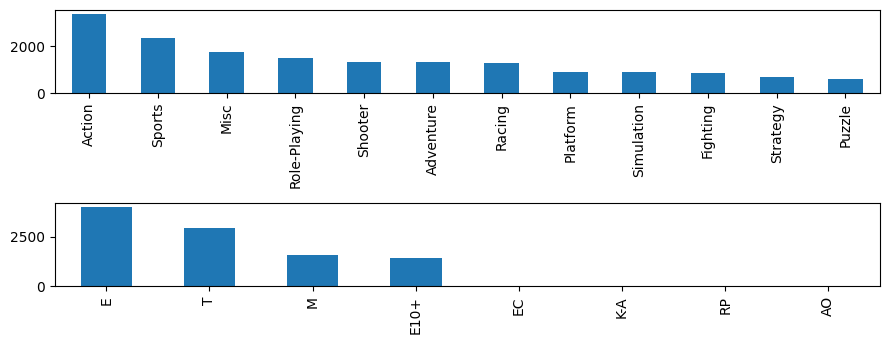

In [17]:
# CAT COLS

nrows=3
ncols=1
rep=1

plt.figure(figsize=(9,5))
for i in catcols:
    plt.subplot(nrows,ncols,rep)
    df.loc[:,i].value_counts().plot(kind='bar')
    plt.xticks(rotation=90)
    rep+=1
    
plt.tight_layout()
plt.show()

# BIVARIATE ANALYSIS

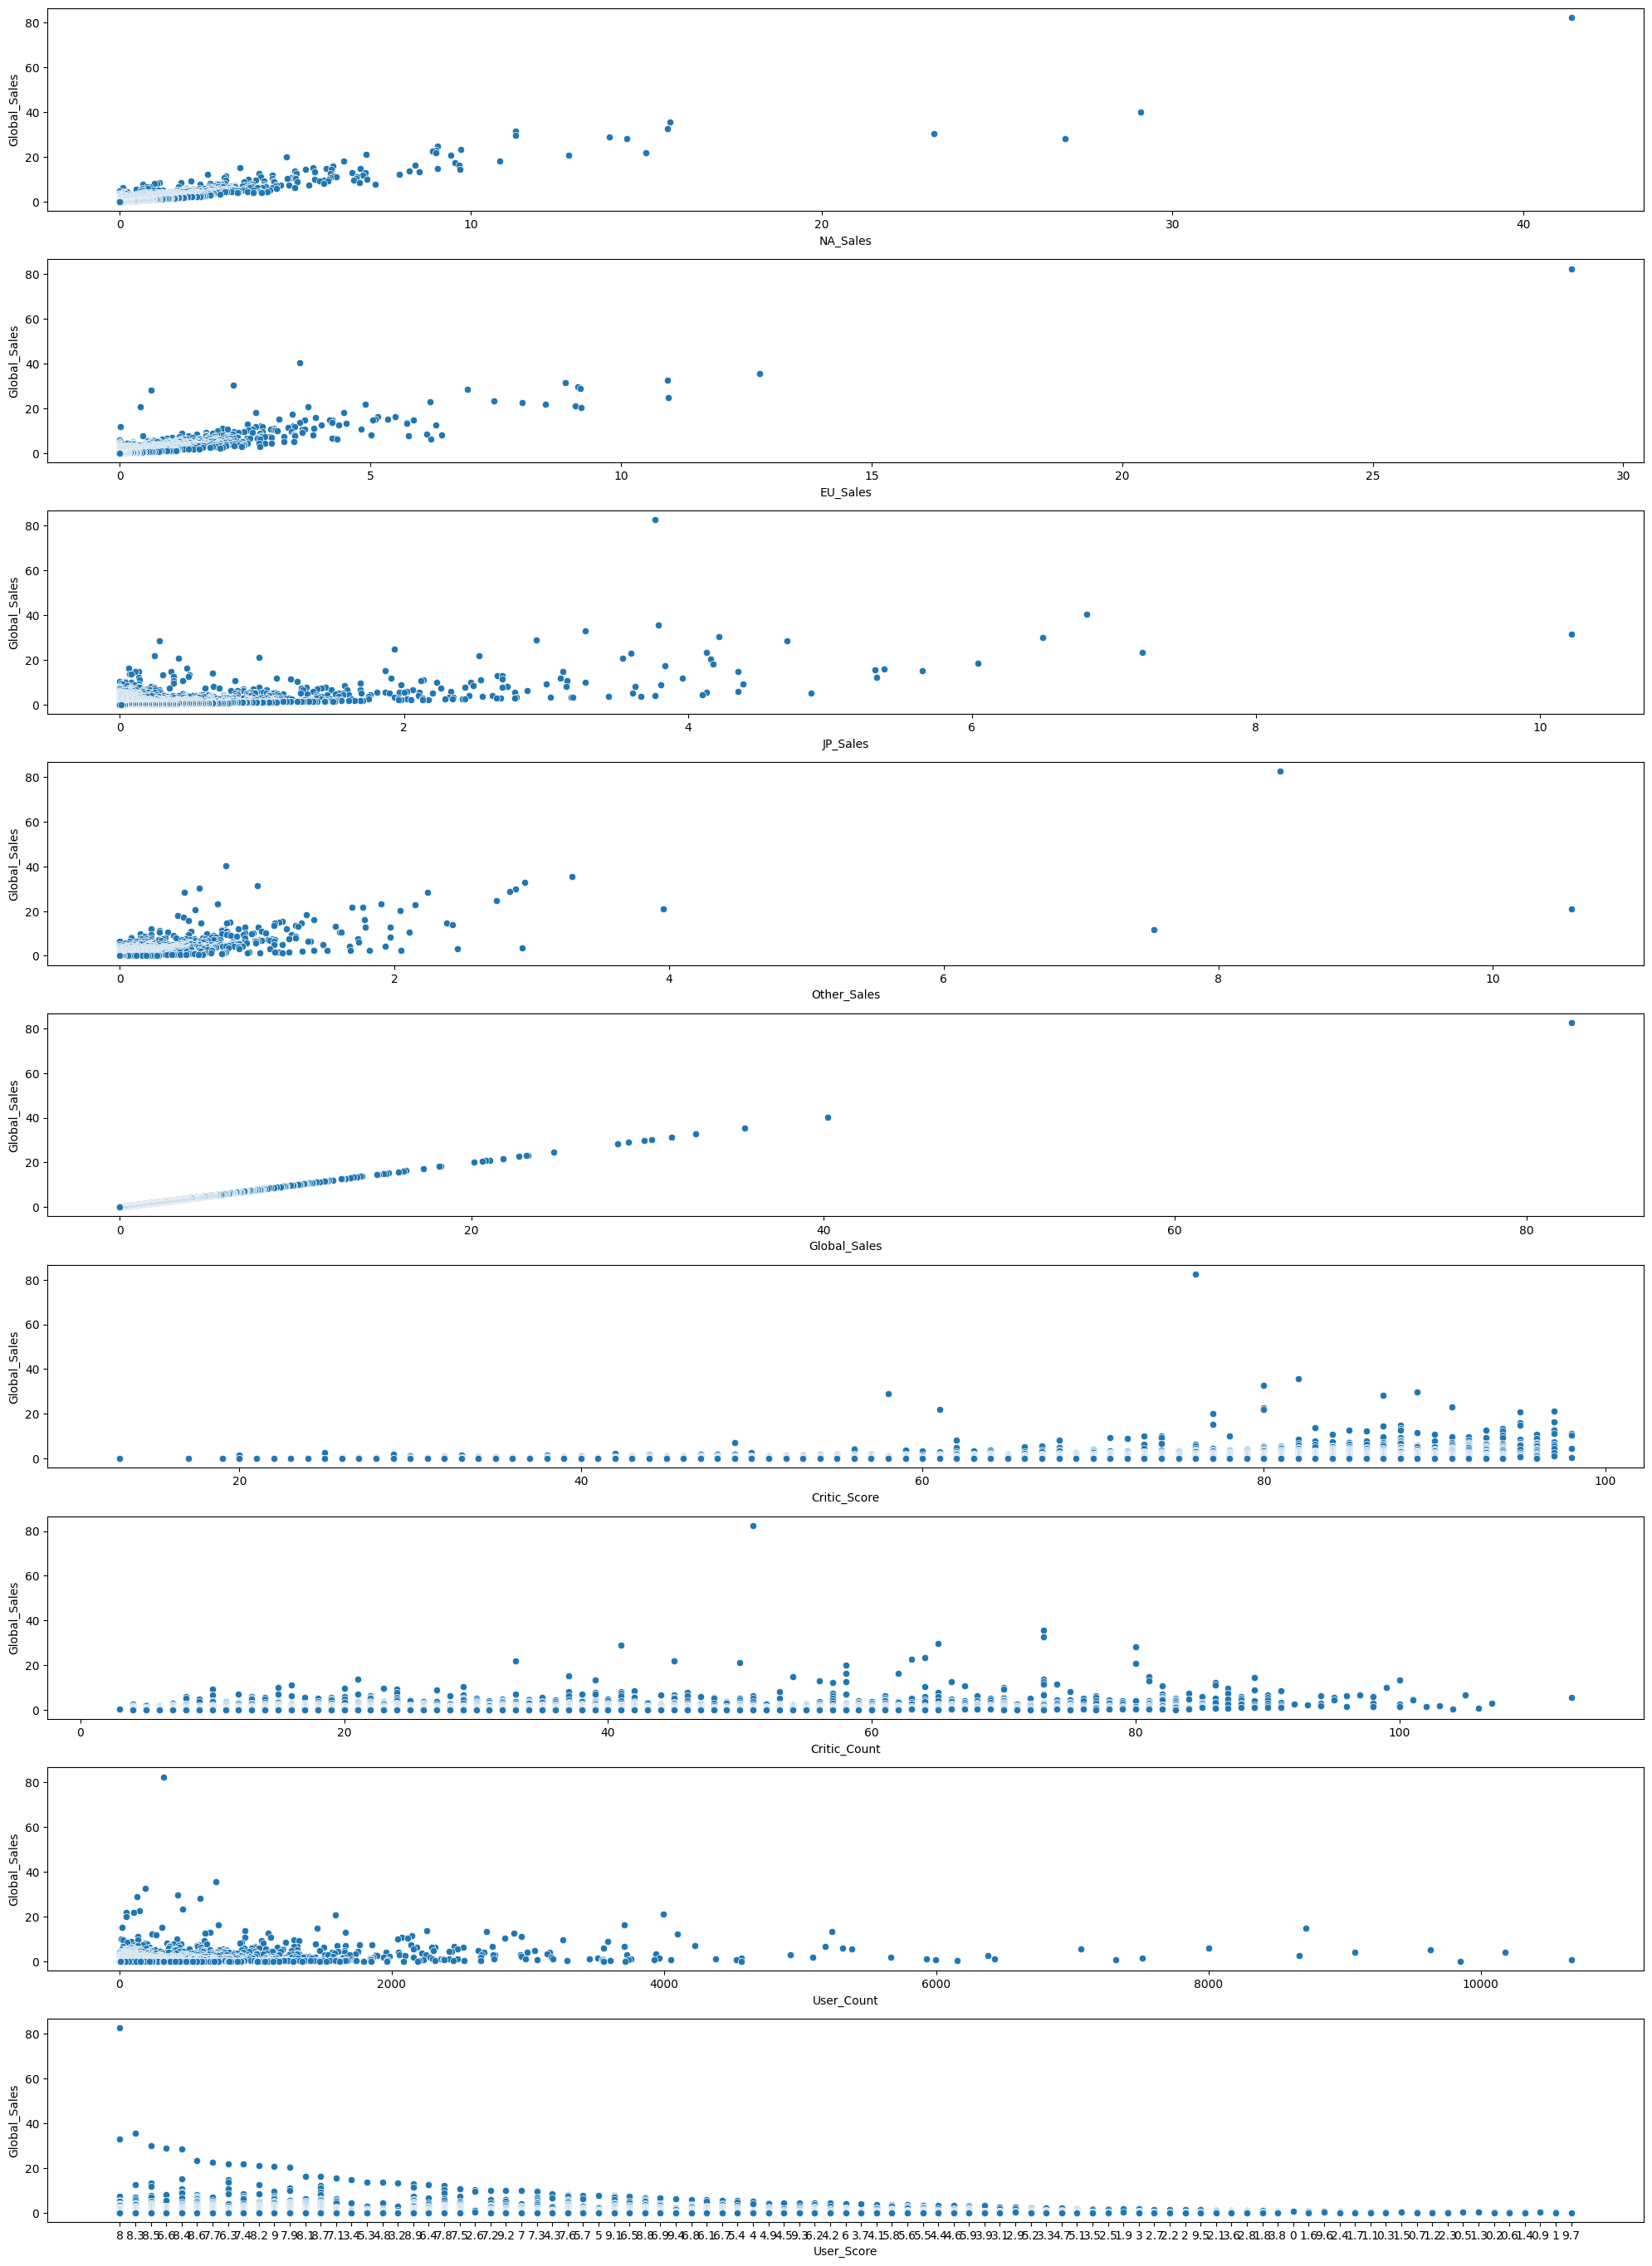

In [18]:
rep=1
nrows=10
ncols=1


plt.figure(figsize=(20,30))
for i in numcols:
    plt.subplot(nrows,ncols,rep)
    sns.scatterplot(x=i,y='Global_Sales',data=df1)
    rep+=1

plt.tight_layout()
plt.show()

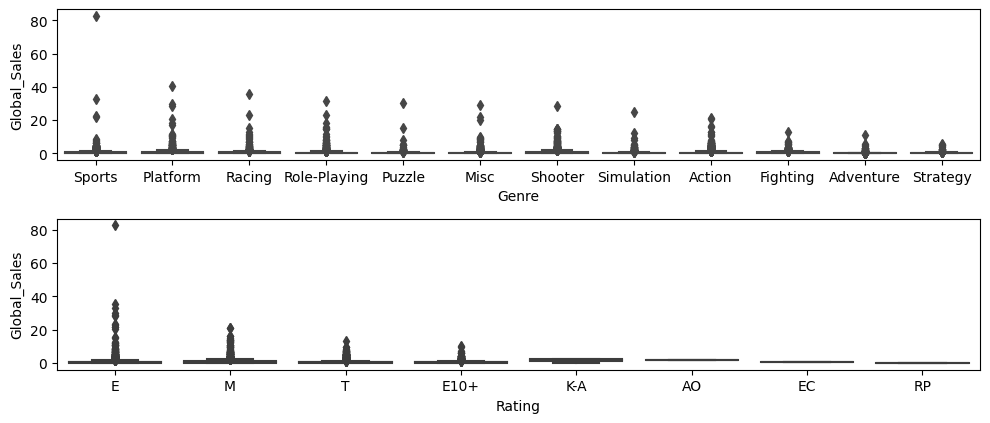

In [19]:
# BIVARIATE ANALYSIS


rep=1
nrows=3
ncols=1

plt.figure(figsize=(10,6))
for i in catcols:
    plt.subplot(nrows,ncols,rep)
    sns.boxplot(x=i,y='Global_Sales',data=df1)
    rep+=1

plt.tight_layout()
plt.show()

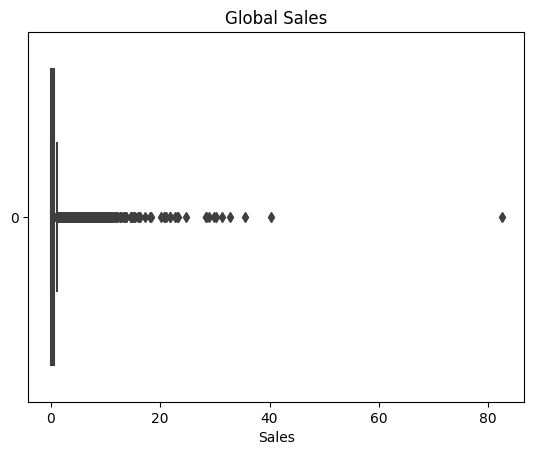

In [20]:
# Target Variable


sns.boxplot(df.Global_Sales,orient='h')
plt.xlabel('Sales')
plt.title('Global Sales')
plt.show()

# DATA VISUALISATION

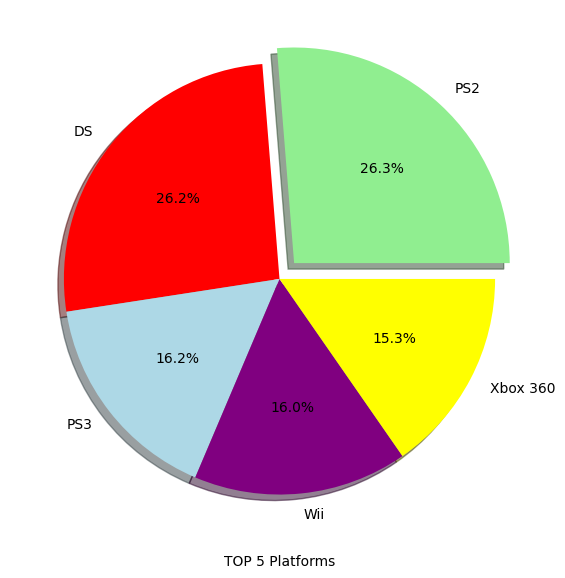

In [21]:
plt.figure(figsize=(16,7))
plt.pie(x=df.Platform.value_counts().sort_values(ascending=False).head(5),labels=['PS2','DS','PS3','Wii','Xbox 360'],shadow=True,autopct='%1.1f%%'
       ,explode=(0.1, 0, 0,0,0),colors=['lightgreen','red','lightblue','purple','yellow'])
plt.xlabel('TOP 5 Platforms')
plt.xticks(rotation=1)
plt.show()

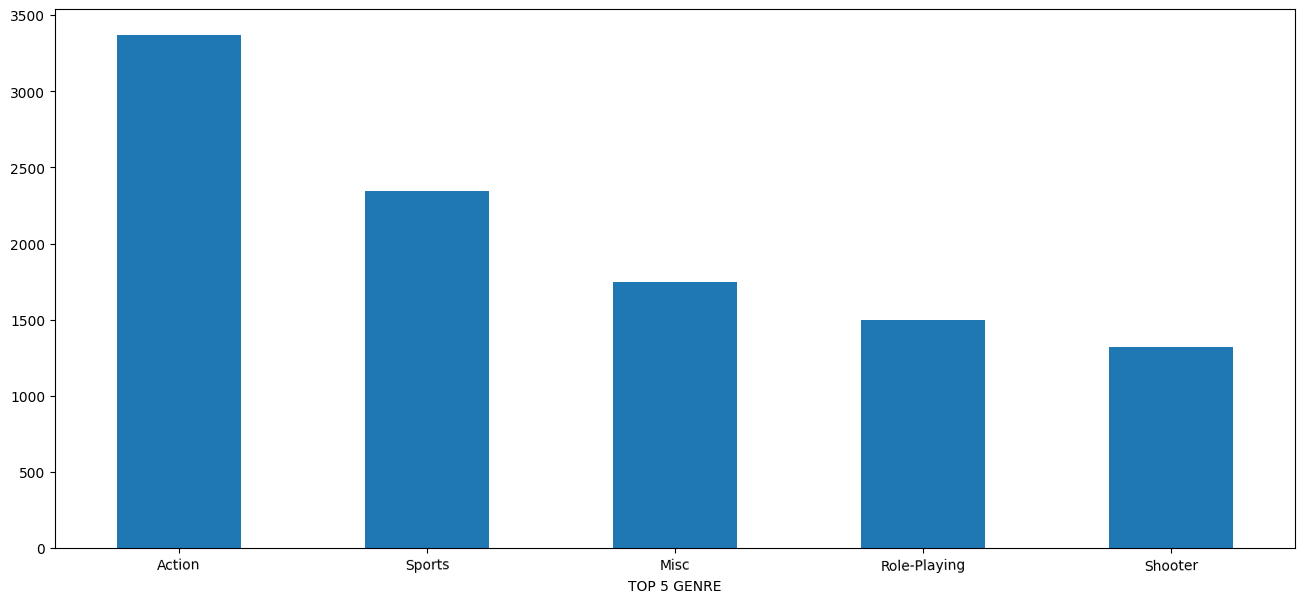

In [22]:
plt.figure(figsize=(16,7))
df.Genre.value_counts().sort_values(ascending=False).head(5).plot(kind='bar')
plt.xlabel('TOP 5 GENRE')
plt.xticks(rotation=1)
plt.show()

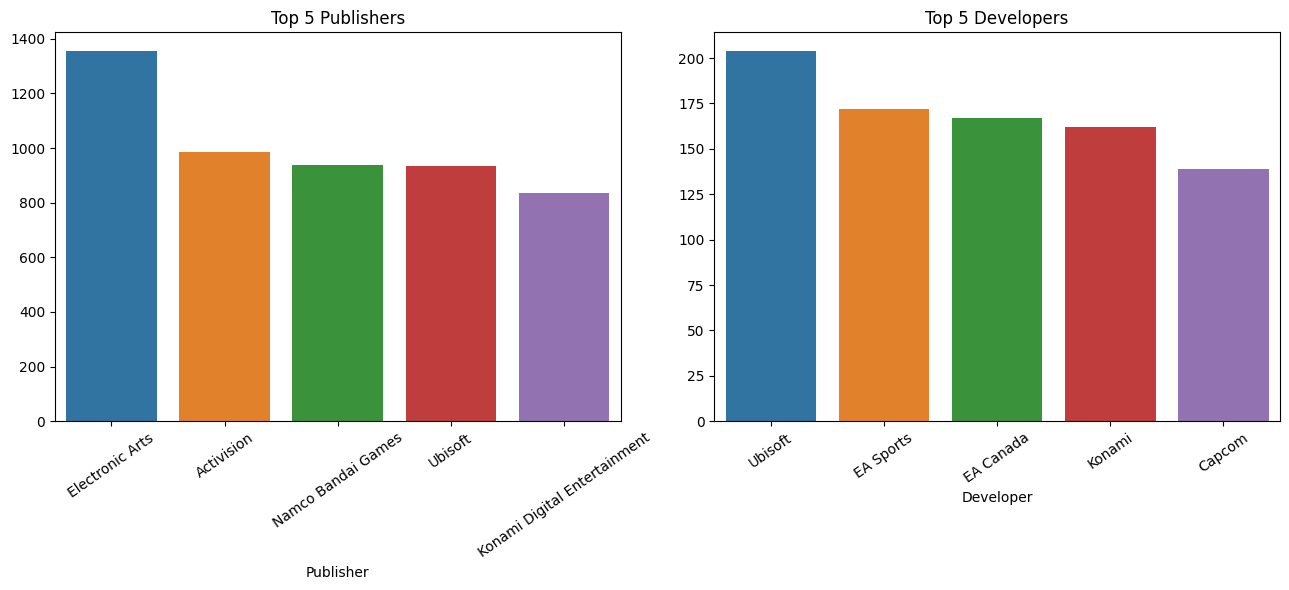

In [23]:
a=['Publisher','Developer']
rep=1
nrows=1
ncols=2


plt.figure(figsize=(13,6))
for i in a:
    b=df[i].value_counts().head(5)
    plt.subplot(nrows,ncols,rep)
    sns.barplot(x=b.index,y=b.values)
    plt.xlabel(i)
    plt.title(f"Top 5 {i}s")
    plt.xticks(rotation=35)
    rep+=1
    
plt.tight_layout()
plt.show()

In [24]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


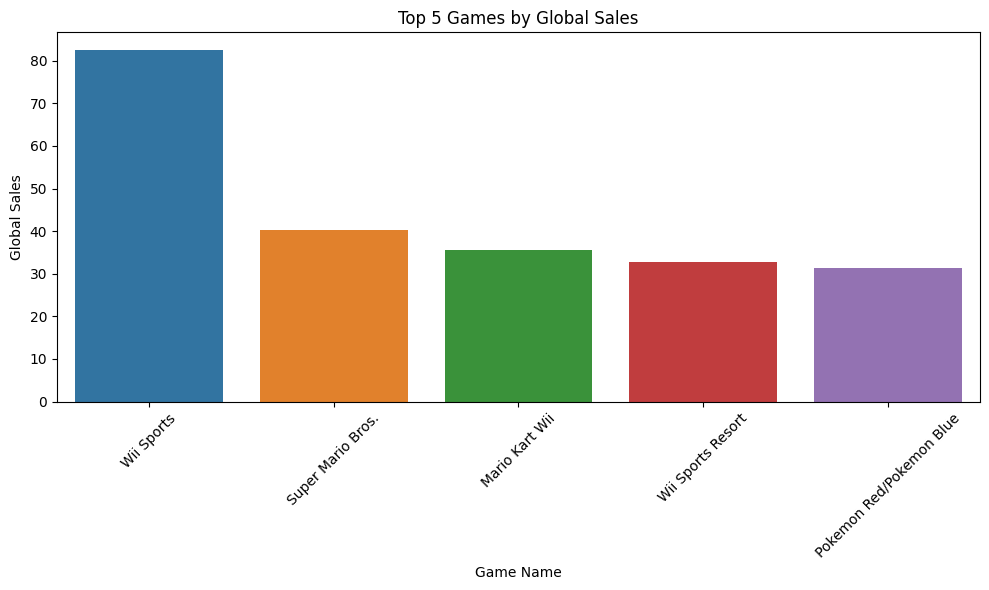

In [25]:
top_5_games = df.nlargest(5, 'Global_Sales')

plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_games, x='Name', y='Global_Sales')
plt.xlabel('Game Name')
plt.ylabel('Global Sales')
plt.title('Top 5 Games by Global Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
from powerbiclient import Report,models
from io import StringIO

# INTERACTIVE POWER BI DASHBOARD

In [27]:
from IPython.display import IFrame

In [28]:
IFrame(src='https://app.powerbi.com/reportEmbed?reportId=c4f6010c-381e-4020-a293-7d84cdaf1dfe&autoAuth=true&ctid=ff44a420-b629-4da0-939f-e55035f1cb1c',height=636,width=1000)

In [29]:
# NULL VALUE REMOVAL AND NORMALISATION

In [30]:
df1.isnull().sum()

Genre              2
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score    7239
Critic_Count    7239
User_Score      6704
User_Count      6704
Rating          6719
dtype: int64

In [31]:
df1[df1.Genre.isnull()].index

Int64Index([659, 14246], dtype='int64')

In [32]:
a=[659, 14246]

In [33]:
df1.drop(a,inplace=True)

In [34]:
df1

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Sports,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,E
1,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Racing,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,E
3,Sports,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,E
4,Role-Playing,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16714,Action,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN
16715,Sports,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN
16716,Adventure,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN
16717,Platform,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN


In [35]:
df1.isnull().sum()

Genre              0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score    7237
Critic_Count    7237
User_Score      6702
User_Count      6702
Rating          6717
dtype: int64

In [36]:
df1.loc[:,numcols].isnull().sum()

NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score    7237
Critic_Count    7237
User_Count      6702
User_Score      6702
dtype: int64

In [37]:
from sklearn.impute import SimpleImputer
si = SimpleImputer()

In [38]:
nullcols = ['Critic_Score','Critic_Count','User_Count','User_Score']

for i in nullcols:
    df1[i] = si.fit_transform(df1[i].values.reshape(-1, 1))

In [39]:
df1.Rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [40]:
si = SimpleImputer(strategy='most_frequent')

In [41]:
df1['Rating'] = si.fit_transform(df1.Rating.values.reshape(-1, 1))

In [42]:
df1

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Sports,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,8.000000,322.000000,E
1,Platform,29.08,3.58,6.81,0.77,40.24,70.233877,28.689865,7.125046,162.229908,T
2,Racing,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,8.300000,709.000000,E
3,Sports,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,8.000000,192.000000,E
4,Role-Playing,11.27,8.89,10.22,1.00,31.37,70.233877,28.689865,7.125046,162.229908,T
...,...,...,...,...,...,...,...,...,...,...,...
16714,Action,0.00,0.00,0.01,0.00,0.01,70.233877,28.689865,7.125046,162.229908,T
16715,Sports,0.00,0.01,0.00,0.00,0.01,70.233877,28.689865,7.125046,162.229908,T
16716,Adventure,0.00,0.00,0.01,0.00,0.01,70.233877,28.689865,7.125046,162.229908,T
16717,Platform,0.01,0.00,0.00,0.00,0.01,70.233877,28.689865,7.125046,162.229908,T


In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [44]:
a = ['Genre','Rating']

for i in a:
    df1[i] = le.fit_transform(df1[i])

In [45]:
df1

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,10,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,8.000000,322.000000,1
1,4,29.08,3.58,6.81,0.77,40.24,70.233877,28.689865,7.125046,162.229908,7
2,6,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,8.300000,709.000000,1
3,10,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,8.000000,192.000000,1
4,7,11.27,8.89,10.22,1.00,31.37,70.233877,28.689865,7.125046,162.229908,7
...,...,...,...,...,...,...,...,...,...,...,...
16714,0,0.00,0.00,0.01,0.00,0.01,70.233877,28.689865,7.125046,162.229908,7
16715,10,0.00,0.01,0.00,0.00,0.01,70.233877,28.689865,7.125046,162.229908,7
16716,1,0.00,0.00,0.01,0.00,0.01,70.233877,28.689865,7.125046,162.229908,7
16717,4,0.01,0.00,0.00,0.00,0.01,70.233877,28.689865,7.125046,162.229908,7


In [46]:
df1.std()

Genre             3.795387
NA_Sales          0.874510
EU_Sales          0.540508
JP_Sales          0.332168
Other_Sales       0.200809
Global_Sales      1.662698
Critic_Score      9.755625
Critic_Count     13.464689
User_Score        1.093085
User_Count      409.017918
Rating            2.409662
dtype: float64

In [47]:
a= ['Genre','Critic_Score','Critic_Count','User_Count','Rating']

In [48]:
df1[a] =sc.fit_transform(df1.loc[:,a])

In [49]:
df1

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,1.347227,41.36,28.96,3.77,8.45,82.53,5.910770e-01,1.656995,8.000000,3.906325e-01,-1.827853
1,-0.233694,29.08,3.58,6.81,0.77,40.24,-1.456734e-15,0.000000,7.125046,6.949012e-17,0.662211
2,0.293280,15.68,12.76,3.79,3.29,35.52,1.206128e+00,3.290955,8.300000,1.336834e+00,-1.827853
3,1.347227,15.61,10.93,3.28,2.95,32.77,1.001111e+00,3.290955,8.000000,7.278687e-02,-1.827853
4,0.556767,11.27,8.89,10.22,1.00,31.37,-1.456734e-15,0.000000,7.125046,6.949012e-17,0.662211
...,...,...,...,...,...,...,...,...,...,...,...
16714,-1.287642,0.00,0.00,0.01,0.00,0.01,-1.456734e-15,0.000000,7.125046,6.949012e-17,0.662211
16715,1.347227,0.00,0.01,0.00,0.00,0.01,-1.456734e-15,0.000000,7.125046,6.949012e-17,0.662211
16716,-1.024155,0.00,0.00,0.01,0.00,0.01,-1.456734e-15,0.000000,7.125046,6.949012e-17,0.662211
16717,-0.233694,0.01,0.00,0.00,0.00,0.01,-1.456734e-15,0.000000,7.125046,6.949012e-17,0.662211


In [50]:
df1.std()

Genre           1.000035
NA_Sales        0.874510
EU_Sales        0.540508
JP_Sales        0.332168
Other_Sales     0.200809
Global_Sales    1.662698
Critic_Score    1.000035
Critic_Count    1.000035
User_Score      1.093085
User_Count      1.000035
Rating          1.000035
dtype: float64

In [51]:
df1.skew()

Genre            0.072791
NA_Sales        17.594799
EU_Sales        17.701565
JP_Sales        10.423292
Other_Sales     23.026865
Global_Sales    16.295895
Critic_Score    -1.060232
Critic_Count     1.482526
User_Score      -1.721455
User_Count      12.394509
Rating          -1.051705
dtype: float64

In [52]:
from scipy.stats import yeojohnson

In [53]:
for column in df1.columns:
    df1[column], _ = yeojohnson(df1[column])

In [54]:
df1.skew()

Genre           0.030571
NA_Sales        0.607921
EU_Sales        0.851477
JP_Sales        1.154464
Other_Sales     0.952793
Global_Sales    0.490003
Critic_Score    0.077246
Critic_Count   -0.069484
User_Score      0.095295
User_Count      0.109302
Rating         -0.723816
dtype: float64

<Axes: >

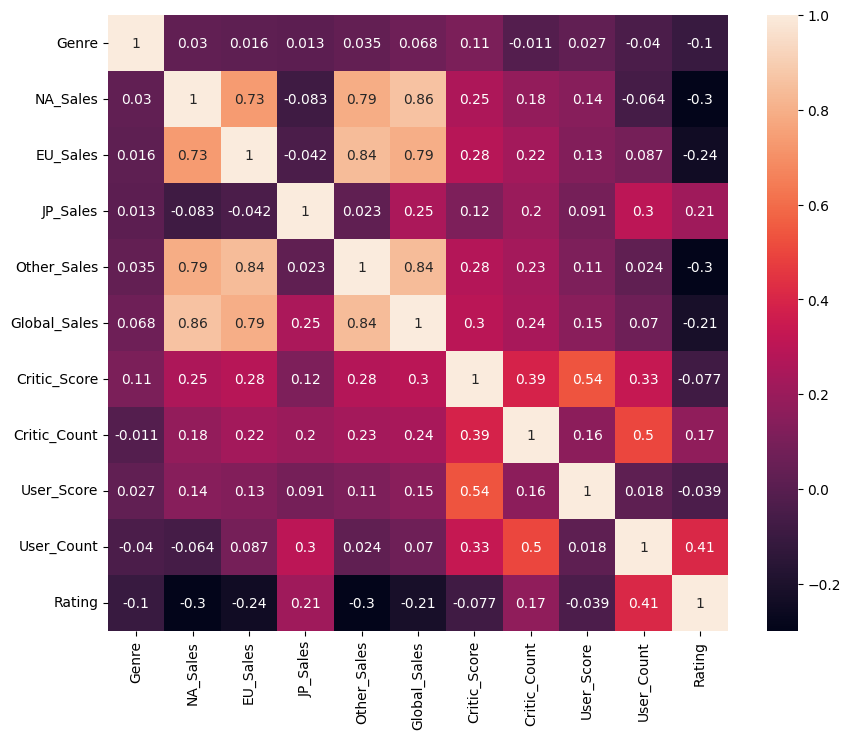

In [55]:
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(),annot=True)

# MODEL BUILDING

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
import statsmodels.api as sma
import statsmodels.formula.api as sfa

In [58]:
X = df1.drop('Global_Sales',axis=1)
y= df1.Global_Sales

xtrain,xtest,ytrain,ytest = train_test_split(X,y,random_state=2,test_size=0.30)
xtrainc= sma.add_constant(xtrain)
xtestc= sma.add_constant(xtest)

In [59]:
m1 = sma.OLS(ytrain,xtrainc).fit()

In [60]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 1.034e+04
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        02:17:00   Log-Likelihood:                 18756.
No. Observations:               10004   AIC:                        -3.749e+04
Df Residuals:                    9993   BIC:                        -3.741e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0280      0.001     19.159      0.000       0.025       0.031
Genre            0.0044      0.000     11.793      0.000       0.004       0.005
NA_Sales         0.8104      0.007    108.531      0.000       0.796       0.825
EU_Sales         0.5786      0.014     40.865      0.000       0.551       0.606
JP_Sales         1.2899      0.013     95.579      0.000       1.263       1.316
Other_Sales      1.3896      0.042     33.015      0.000       1.307       1.472
Critic_Score     0.0026      0.001      4.973      0.000       0.002       0.004
Critic_Count    -0.0026      0.000     -5.284      0.000      -0.004      -0.002
User_Score   -2.916e-05   5.82e-06     -5.006      0.000   -4.06e-05   -1.77e-05
User_Count      -0.0054      0.002     -3.194      0.001      -0.009      -0.002
Rating           0.0023      0.001      4.187      0.000       0.001       0.003
==============================================================================
Omnibus:                     4626.105   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38586.499
Skew:                           2.035   Prob(JB):                         0.00
Kurtosis:                      11.718   Cond. No.                     2.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
m2= sfa.ols('Global_Sales~NA_Sales+EU_Sales+JP_Sales+Other_Sales+Global_Sales',data=df1).fit()

In [62]:
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.577e+32
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        02:17:00   Log-Likelihood:             4.8582e+05
No. Observations:               14292   AIC:                        -9.716e+05
Df Residuals:                   14286   BIC:                        -9.716e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -3.912e-16   6.19e-18    -63.246      0.000   -4.03e-16   -3.79e-16
NA_Sales      8.307e-15   1.02e-16     81.684      0.000    8.11e-15    8.51e-15
EU_Sales      2.519e-15   1.41e-16     17.878      0.000    2.24e-15    2.79e-15
JP_Sales      1.095e-14   1.67e-16     65.639      0.000    1.06e-14    1.13e-14
Other_Sales   9.111e-15   4.11e-16     22.161      0.000     8.3e-15    9.92e-15
Global_Sales     1.0000   9.16e-17   1.09e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                     2437.724   Durbin-Watson:                   0.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7417.639
Skew:                          -0.888   Prob(JB):                         0.00
Kurtosis:                       6.050   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [64]:
def allmat1(ytest,ypred,xtrain):
    mse = mean_squared_error(ytest, ypred)
    mae = mean_absolute_error(ytest, ypred)
    r2 = r2_score(ytest, ypred)
    rmse = np.sqrt(mse)
    n = xtrain.shape[0]
    k = xtrain.shape[1]
    adj_r2 = 1-(((1-r2)*(n-1))/(n-k-1))
    
    print('MSE:',mse,
         'MAE:',mae,
         'r2:',r2,
         'rmse:',rmse,
          'Adj R2:',adj_r2)

In [65]:
params = {'criterion':['squared_error'],'max_depth':[10,11,12],'random_state':[20],'max_features':[7,8]}

In [66]:
gscv= GridSearchCV(estimator=DecisionTreeRegressor(),param_grid=params,n_jobs=100,verbose=2,scoring='f1')

In [67]:
gscv.fit(xtrain,ytrain)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(estimator=DecisionTreeRegressor(), n_jobs=100,
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [10, 11, 12], 'max_features': [7, 8],
                         'random_state': [20]},
             scoring='f1', verbose=2)

In [68]:
dt= DecisionTreeRegressor(**gscv.best_params_)

In [69]:
m3 = dt.fit(xtrain,ytrain)

In [70]:
ypred_m3 = m3.predict(xtest)

In [71]:
allmat1(ytest=ytest,ypred=ypred_m3,xtrain=xtrain)

MSE: 0.00020207544727621183 MAE: 0.00844953997830772 r2: 0.9873558698826019 rmse: 0.014215324381673878 Adj R2: 0.9873432168953935


In [72]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [73]:
m4 = rfr.fit(xtrain,ytrain)

In [74]:
ypred_m4 = m4.predict(xtest)

In [75]:
allmat1(ytest=ytest,ypred=ypred_m4,xtrain=xtrain)

MSE: 2.9210614614975996e-05 MAE: 0.002966240748513243 r2: 0.9981722529036589 rmse: 0.005404684506516175 Adj R2: 0.9981704238762433


In [76]:
# Lets try some boosting techniques


from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor

In [77]:
abr = AdaBoostRegressor(n_estimators=150)

In [78]:
m5 = abr.fit(xtrain,ytrain)

In [79]:
ypred_m5 = m5.predict(xtest)

In [80]:
allmat1(ytest=ytest,ypred=ypred_m5,xtrain=xtrain)

MSE: 0.0017430759664134163 MAE: 0.03529853211965243 r2: 0.8909334131339807 rmse: 0.04175016127410068 Adj R2: 0.8908242701470238


In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [82]:
# VIF

vif = [variance_inflation_factor(xtrainc.values,i) for i in range(xtrainc.shape[1])]
pd.DataFrame({'VIF':vif},xtrainc.columns)

,VIF
const,15.462866
Genre,1.031014
NA_Sales,2.938161
EU_Sales,3.721542
JP_Sales,1.173224
Other_Sales,4.647560
Critic_Score,1.935814
Critic_Count,1.528342
User_Score,1.506744
User_Count,1.920537


In [83]:
xgb = XGBRegressor(max_depth=8, max_leaves=2, colsample_bytree=0.8)

In [84]:
m6= xgb.fit(xtrain,ytrain)

In [85]:
ypred_m6 = m6.predict(xtest)

In [86]:
allmat1(ytest=ytest,ypred=ypred_m6,xtrain=xtrain)

MSE: 0.001278434381096405 MAE: 0.023451173220123144 r2: 0.9200066565284246 rmse: 0.03575520075592368 Adj R2: 0.9199266071503884


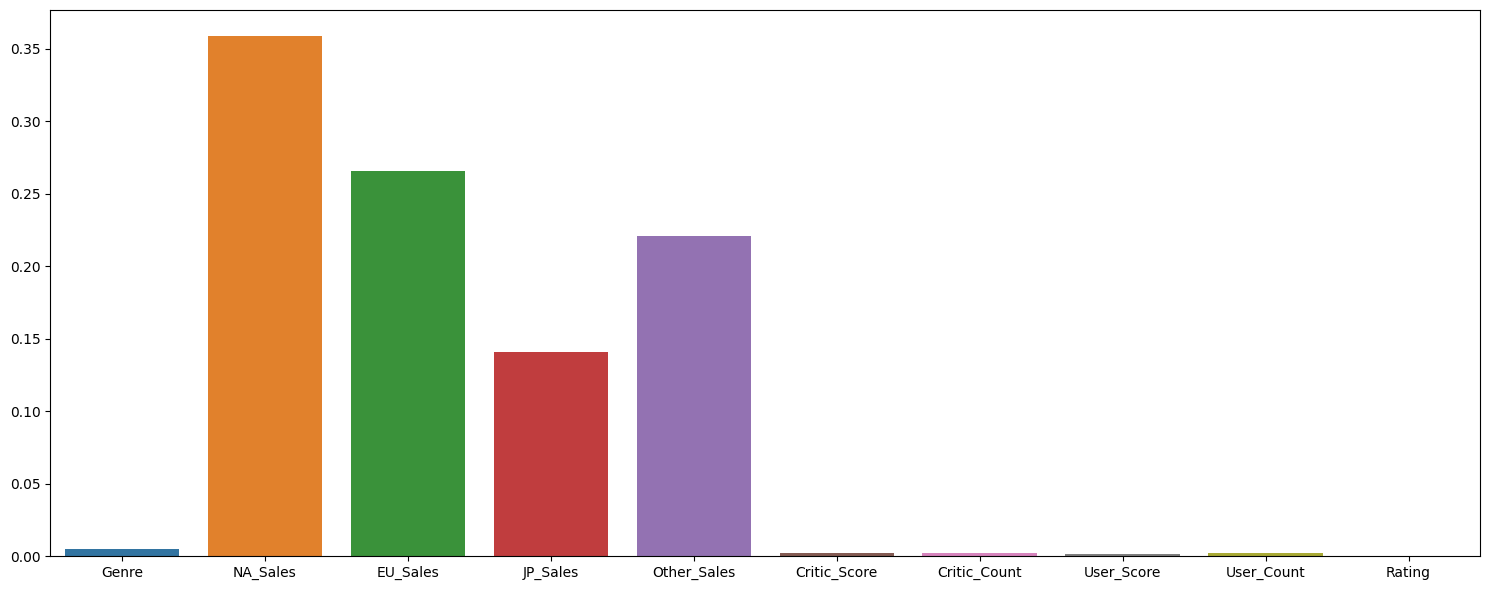

In [87]:
# Feature importance according to the Model 6
plt.figure(figsize=(15,6))
sns.barplot(x = m6.feature_names_in_,y= m6.feature_importances_)
plt.tight_layout()
plt.show()